# **1. Numpy Array Vs Python Lists**

In [2]:
# Difference of Speed between Numpy Arrays and Python List
import time
import numpy as np

# List Speed
a = [i for i in range(10000000)]
b = [i for i in range(10000000,20000000)]

c= []

start = time.time()
for i in range(len(a)):
  c.append(a[i] + b[i])
print(time.time()-start)

# Numpy Array Speed
a = np.arange(10000000)
b = np.arange(10000000,20000000)

start = time.time()
c = a + b
print(time.time()-start)

2.414973735809326
0.05211973190307617


In [3]:
2.4149/0.0521

# Numpy Array is approx 46x faster than Python List.

46.35124760076775

In [7]:
# Difference of Memory between Numpy Arrays and Python List
import sys

# List
a = [i for i in range(10000000)]
print(sys.getsizeof(a))

# Numpy Array
a = np.arange(10000000)
print(sys.getsizeof(a))

a = np.arange(10000000,dtype=np.int32)
print(sys.getsizeof(a))

89095160
80000112
40000112


In [ ]:
# Difference of Convenience between Numpy Arrays and Python List

# As we are merging two list above it is much more complex than adding two numpy arrays

# **2. Advanced Indexing**

### **Fancy Indexing**

In [11]:
a = np.arange(0,12).reshape(4,3)
print(a,'\n')
a[[0,2,3]]

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]] 



array([[ 0,  1,  2],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [15]:
a = np.arange(0,24).reshape(6,4)
print(a,'\n')
print(a[[0,2,3,5]],'\n')
print(a[:,[0,2,3]],'\n')

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]] 

[[ 0  1  2  3]
 [ 8  9 10 11]
 [12 13 14 15]
 [20 21 22 23]] 

[[ 0  2  3]
 [ 4  6  7]
 [ 8 10 11]
 [12 14 15]
 [16 18 19]
 [20 22 23]]


### **Boolean Indexing**

In [16]:
a = np.random.randint(1,100,24).reshape(6,4)
print(a,'\n')

[[72 13 51 36]
 [72 99 55 73]
 [48 14 87 64]
 [63 82 38 44]
 [45 60 25 87]
 [98 33 54 19]] 



In [20]:
# find all the numbers greater than 50
print(a>50,'\n')
print(a[a>50])       # Used In many scenarios

[[ True False  True False]
 [ True  True  True  True]
 [False False  True  True]
 [ True  True False False]
 [False  True False  True]
 [ True False  True False]] 

[72 51 72 99 55 73 87 64 63 82 60 87 98 54]


In [21]:
# find out even numbers
print(a[a%2 == 0])

[72 36 72 48 14 64 82 38 44 60 98 54]


In [34]:
# find all numbers greater than 50 and are even
print(a[(a>50) & (a%2==0)])                 # Using bitwise and for boolean values

[72 72 64 82 60 98 54]


In [37]:
# find all numbers not divisible by 7
print(a[a%7 != 0],'\n')
# OR
print(a[~(a%7 == 0)])              # ~ = NOT

[72 13 51 36 72 99 55 73 48 87 64 82 38 44 45 60 25 87 33 54 19] 

[72 13 51 36 72 99 55 73 48 87 64 82 38 44 45 60 25 87 33 54 19]


# **3. Broadcasting**
* **The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations**
* **The smaller array is "broadcast" across the larger array so that they have compatible shapes.**

In [38]:
# Same Shape

a = np.arange(6).reshape(2,3)
b = np.arange(6,12).reshape(2,3)

print(a,'\n')
print(b,'\n')

print(a+b)

[[0 1 2]
 [3 4 5]] 

[[ 6  7  8]
 [ 9 10 11]] 

[[ 6  8 10]
 [12 14 16]]


In [39]:
# Different SHape

a = np.arange(6).reshape(2,3)
b = np.arange(3).reshape(1,3)

print(a,'\n')
print(b,'\n')                   # [[0 1 2]]       # It will broadcast
                                # [[0 1 2]]
print(a+b)

[[0 1 2]
 [3 4 5]] 

[[0 1 2]] 

[[0 2 4]
 [3 5 7]]


### **Broadcasting Rules**
**1. Make the two arrays have the same number of dimensions.**
*  If the numbers of dimensions of the two arrays are different, add new dimension with size 1 to the head of the array with the smaller dimension.

**2. Make each dimension of the two arrays the same size.**
*  If the sizes of each dimension of two arrays do not match, dimensions with size 1 are stretched to the size of the other array.
*  If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised

In [42]:
# Examples

a = np.arange(12).reshape(4,3)
b = np.arange(3)

print(a,'\n')
print(b,'\n')

print(a+b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]] 

[0 1 2] 

[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [ ]:
a = np.arange(12).reshape(3,4)
b = np.arange(3)       # Could not broadcast (3,3)

print(a,'\n')
print(b,'\n')

In [44]:
a = np.arange(3).reshape(1,3)
b = np.arange(3).reshape(3,1)

print(a,'\n')
print(b,'\n')

print(a+b)

[[0 1 2]] 

[[0]
 [1]
 [2]] 

[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [45]:
a = np.arange(3).reshape(1,3)
b = np.arange(4).reshape(4,1)

print(a,'\n')
print(b,'\n')

print(a+b)

[[0 1 2]] 

[[0]
 [1]
 [2]
 [3]] 

[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [47]:
a = np.arange(4).reshape(2,2)
b = np.array([1])

print(a,'\n')
print(b,'\n')

print(a+b)

[[0 1]
 [2 3]] 

[1] 

[[1 2]
 [3 4]]


# **4. Mathematical Formulas**

In [49]:
a = np.arange(10)
print(a,'\n')
print(sum(a),'\n')
print(np.sin(a),'\n')

[0 1 2 3 4 5 6 7 8 9] 

45 

[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427
 -0.2794155   0.6569866   0.98935825  0.41211849] 



In [53]:
# Sigmoid
a = np.arange(20)

def sigmoid(a):
  return 1/(1 + np.exp(-(a)))

print(sigmoid(a))

[0.5        0.73105858 0.88079708 0.95257413 0.98201379 0.99330715
 0.99752738 0.99908895 0.99966465 0.99987661 0.9999546  0.9999833
 0.99999386 0.99999774 0.99999917 0.99999969 0.99999989 0.99999996
 0.99999998 0.99999999]


In [56]:
# Mean Squared Error

actual = np.random.randint(1,50,25)
predicted = np.random.randint(1,50,25)

print(predicted,'\n')
print(actual,'\n')

[ 4 43  1 26 40 32 20 22 13 24  8 24 43 15  4 22 35 24 27  6 26  7 18 25
 30] 

[43 11 46 24 39 12 16 15 18 22 12 25 27  8 36 42 35 34 30  9 42 12  3 26
 25] 



In [58]:
def mean_squared_error(actual,predicted):
  return np.mean((actual-predicted)**2)

mean_squared_error(actual,predicted)

298.6

# **5. Working with Missing Values**

In [59]:
# Using np.nan (Missing Value)

a = np.array([1,2,3,4,np.nan,6])
print(a)

[ 1.  2.  3.  4. nan  6.]


In [63]:
print(np.isnan(a),'\n')
print(a[~(np.isnan(a))])

[False False False False  True False] 

[1. 2. 3. 4. 6.]


# **6. Plotting Graphs**

[-10.          -9.59183673  -9.18367347  -8.7755102   -8.36734694
  -7.95918367  -7.55102041  -7.14285714  -6.73469388  -6.32653061
  -5.91836735  -5.51020408  -5.10204082  -4.69387755  -4.28571429
  -3.87755102  -3.46938776  -3.06122449  -2.65306122  -2.24489796
  -1.83673469  -1.42857143  -1.02040816  -0.6122449   -0.20408163
   0.20408163   0.6122449    1.02040816   1.42857143   1.83673469
   2.24489796   2.65306122   3.06122449   3.46938776   3.87755102
   4.28571429   4.69387755   5.10204082   5.51020408   5.91836735
   6.32653061   6.73469388   7.14285714   7.55102041   7.95918367
   8.36734694   8.7755102    9.18367347   9.59183673  10.        ] 



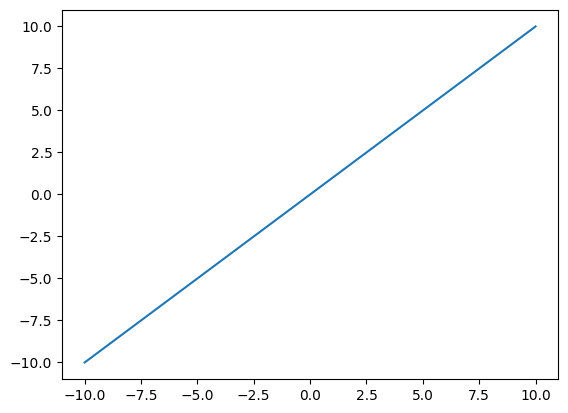

In [64]:
# Plotting a 2D Graph
import matplotlib.pyplot as plt

x = np.linspace(-10,10,50)
y = x
print(x,'\n')
plt.plot(x,y)          # x = y

[-10.          -9.59183673  -9.18367347  -8.7755102   -8.36734694
  -7.95918367  -7.55102041  -7.14285714  -6.73469388  -6.32653061
  -5.91836735  -5.51020408  -5.10204082  -4.69387755  -4.28571429
  -3.87755102  -3.46938776  -3.06122449  -2.65306122  -2.24489796
  -1.83673469  -1.42857143  -1.02040816  -0.6122449   -0.20408163
   0.20408163   0.6122449    1.02040816   1.42857143   1.83673469
   2.24489796   2.65306122   3.06122449   3.46938776   3.87755102
   4.28571429   4.69387755   5.10204082   5.51020408   5.91836735
   6.32653061   6.73469388   7.14285714   7.55102041   7.95918367
   8.36734694   8.7755102    9.18367347   9.59183673  10.        ] 

[1.00000000e+02 9.20033319e+01 8.43398584e+01 7.70095793e+01
 7.00124948e+01 6.33486047e+01 5.70179092e+01 5.10204082e+01
 4.53561016e+01 4.00249896e+01 3.50270721e+01 3.03623490e+01
 2.60308205e+01 2.20324865e+01 1.83673469e+01 1.50354019e+01
 1.20366514e+01 9.37109538e+00 7.03873386e+00 5.03956685e+00
 3.37359434e+00 2.04081633e+00 1

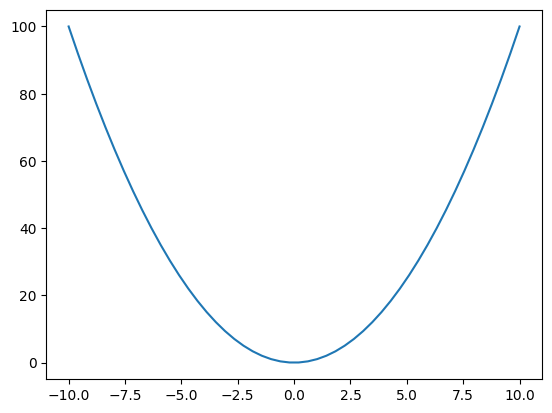

In [67]:
# y = x**2

x = np.linspace(-10,10,50)
y = x**2
print(x,'\n')
print(y,'\n')
plt.plot(x,y)

[-10.          -9.59183673  -9.18367347  -8.7755102   -8.36734694
  -7.95918367  -7.55102041  -7.14285714  -6.73469388  -6.32653061
  -5.91836735  -5.51020408  -5.10204082  -4.69387755  -4.28571429
  -3.87755102  -3.46938776  -3.06122449  -2.65306122  -2.24489796
  -1.83673469  -1.42857143  -1.02040816  -0.6122449   -0.20408163
   0.20408163   0.6122449    1.02040816   1.42857143   1.83673469
   2.24489796   2.65306122   3.06122449   3.46938776   3.87755102
   4.28571429   4.69387755   5.10204082   5.51020408   5.91836735
   6.32653061   6.73469388   7.14285714   7.55102041   7.95918367
   8.36734694   8.7755102    9.18367347   9.59183673  10.        ] 

[ 0.54402111  0.16628279 -0.23877532 -0.60460332 -0.8710967  -0.99447137
 -0.9544572  -0.75762842 -0.43632343 -0.04333173  0.35677924  0.6982724
  0.92504137  0.99982867  0.91034694  0.67129779  0.32195632 -0.08028167
 -0.46932961 -0.78126802 -0.96484631 -0.98990308 -0.85232157 -0.57470604
 -0.20266794  0.20266794  0.57470604  0.852321

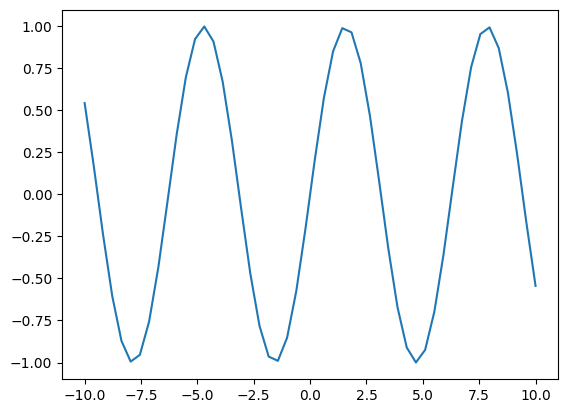

In [68]:
# y = sin(x)

x = np.linspace(-10,10,50)
y = np.sin(x)
print(x,'\n')
print(y,'\n')
plt.plot(x,y)

[-10.          -9.59183673  -9.18367347  -8.7755102   -8.36734694
  -7.95918367  -7.55102041  -7.14285714  -6.73469388  -6.32653061
  -5.91836735  -5.51020408  -5.10204082  -4.69387755  -4.28571429
  -3.87755102  -3.46938776  -3.06122449  -2.65306122  -2.24489796
  -1.83673469  -1.42857143  -1.02040816  -0.6122449   -0.20408163
   0.20408163   0.6122449    1.02040816   1.42857143   1.83673469
   2.24489796   2.65306122   3.06122449   3.46938776   3.87755102
   4.28571429   4.69387755   5.10204082   5.51020408   5.91836735
   6.32653061   6.73469388   7.14285714   7.55102041   7.95918367
   8.36734694   8.7755102    9.18367347   9.59183673  10.        ] 

[            nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
            

<ipython-input-69-4d76b254fc03>:4: RuntimeWarning: invalid value encountered in log
  y = x*(np.log(x))


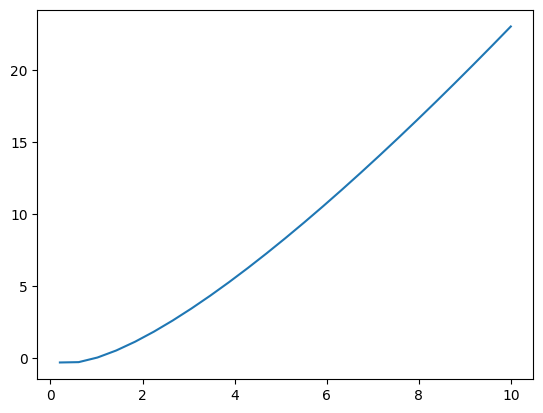

In [69]:
# y = x log(x)

x = np.linspace(-10,10,50)
y = x*(np.log(x))
print(x,'\n')
print(y,'\n')
plt.plot(x,y)

[-10.          -9.59183673  -9.18367347  -8.7755102   -8.36734694
  -7.95918367  -7.55102041  -7.14285714  -6.73469388  -6.32653061
  -5.91836735  -5.51020408  -5.10204082  -4.69387755  -4.28571429
  -3.87755102  -3.46938776  -3.06122449  -2.65306122  -2.24489796
  -1.83673469  -1.42857143  -1.02040816  -0.6122449   -0.20408163
   0.20408163   0.6122449    1.02040816   1.42857143   1.83673469
   2.24489796   2.65306122   3.06122449   3.46938776   3.87755102
   4.28571429   4.69387755   5.10204082   5.51020408   5.91836735
   6.32653061   6.73469388   7.14285714   7.55102041   7.95918367
   8.36734694   8.7755102    9.18367347   9.59183673  10.        ] 

[4.53978687e-05 6.82792246e-05 1.02692018e-04 1.54446212e-04
 2.32277160e-04 3.49316192e-04 5.25297471e-04 7.89865942e-04
 1.18752721e-03 1.78503502e-03 2.68237328e-03 4.02898336e-03
 6.04752187e-03 9.06814944e-03 1.35769169e-02 2.02816018e-02
 3.01959054e-02 4.47353464e-02 6.58005831e-02 9.57904660e-02
 1.37437932e-01 1.93321370e-01 2

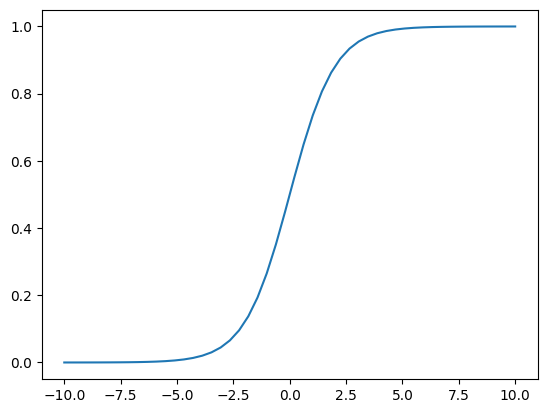

In [73]:
# Sigmoid

x = np.linspace(-10,10,50)
y = 1/(1+np.exp(-x))
print(x,'\n')
print(y,'\n')
plt.plot(x,y)